In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv("haberman.csv",header=None)
df.columns = ["age", "year_of_operation", "aux_nodes", "survival"]

In [66]:
df.head()

,age,year_of_operation,aux_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [67]:
df.describe()

,age,year_of_operation,aux_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [68]:
df.shape

(306, 4)

In [69]:
print (df.columns)

Index(['age', 'year_of_operation', 'aux_nodes', 'survival'], dtype='object')


In [70]:
df["survival"].value_counts()

1    225
2     81
Name: survival, dtype: int64

### Objective:
The objective is to classify the cancer patients who died or survived if 30,64,1 are given as independent variables.

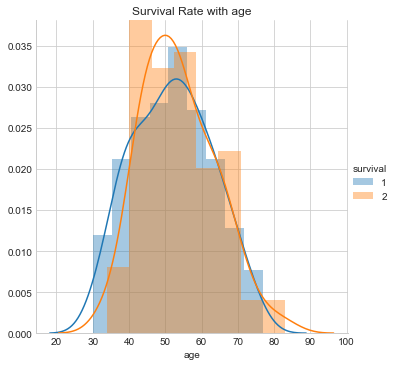

In [63]:
sns.FacetGrid(df, hue="survival", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Survival Rate with age')
plt.show();

### Observation:
The patients who are operated between the age of 30 to 40 has surivied most

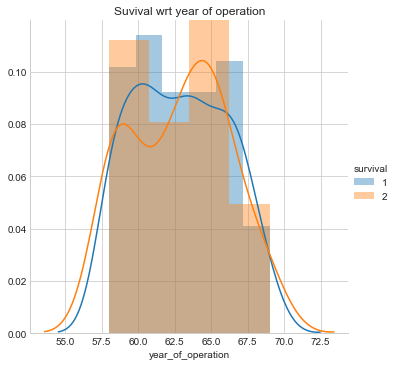

In [72]:
sns.FacetGrid(df, hue="survival", size=5) \
   .map(sns.distplot, "year_of_operation") \
   .add_legend();
plt.title('Suvival wrt year of operation')
plt.show();

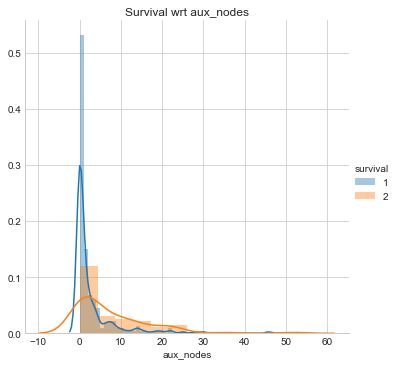

In [73]:
sns.FacetGrid(df, hue="survival", size=5) \
   .map(sns.distplot, "aux_nodes") \
   .add_legend();
plt.title('Survival wrt aux_nodes')
plt.show();

### Observation:
Patients with 0 to 2 aux nodes survived most.

[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
0.18867924528301888
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


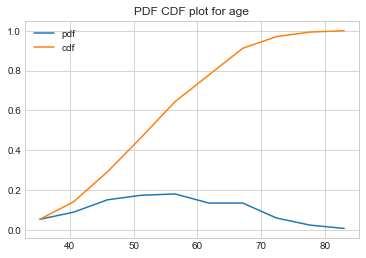

In [74]:
counts, bin_edges = np.histogram(df['age'], bins=10, 
                                 density = True)
print(counts)
print(sum(counts))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf');
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.title("PDF CDF plot for age")

plt.show();

In [75]:
survied = df.loc[df["survival"] == 1];
died = df.loc[df["survival"] == 2];

In [76]:
survied.head()

,age,year_of_operation,aux_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [77]:
died.head()

,age,year_of_operation,aux_nodes,survival
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


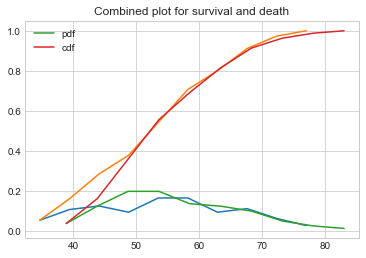

In [78]:
counts, bin_edges = np.histogram(survied['age'], bins=10, 
                                 density = True)
#Survival
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Death
counts, bin_edges = np.histogram(died['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:], cdf,label='cdf')
plt.legend()
plt.title('Combined plot for survival and death')

plt.show();

### Observation:
The patients who are operated within 40 years out of them only 1% survived
Survival rate is high for the patients who are operated after 48 years.

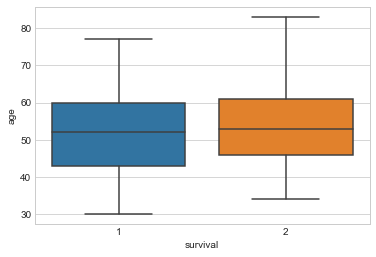

In [79]:
sns.boxplot(x='survival',y='age', data=df)
plt.show()

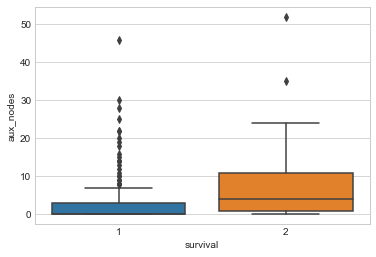

In [80]:
sns.boxplot(x='survival',y='aux_nodes', data=df)
plt.show()

### Observation: 
Eventhough there are more aux nodes still patients survived more than 5 year. It shows more outliers. But we can not eleminate them


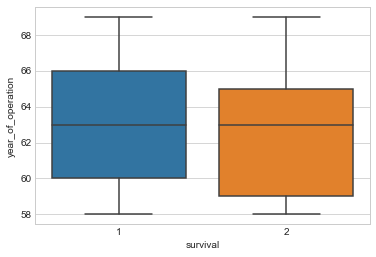

In [81]:
sns.boxplot(x='survival',y='year_of_operation', data=df)
plt.show()

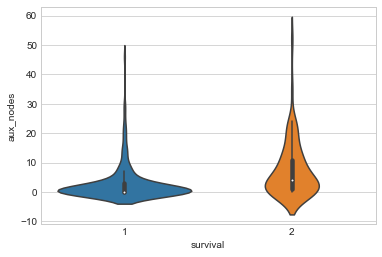

In [82]:
sns.violinplot(x="survival", y="aux_nodes", data=df, size=8)
plt.show()

### observation:

lesser no of aux nodes the survival rate is more. The area is densed near lesser nodes.

In [83]:
df.columns

Index(['age', 'year_of_operation', 'aux_nodes', 'survival'], dtype='object')

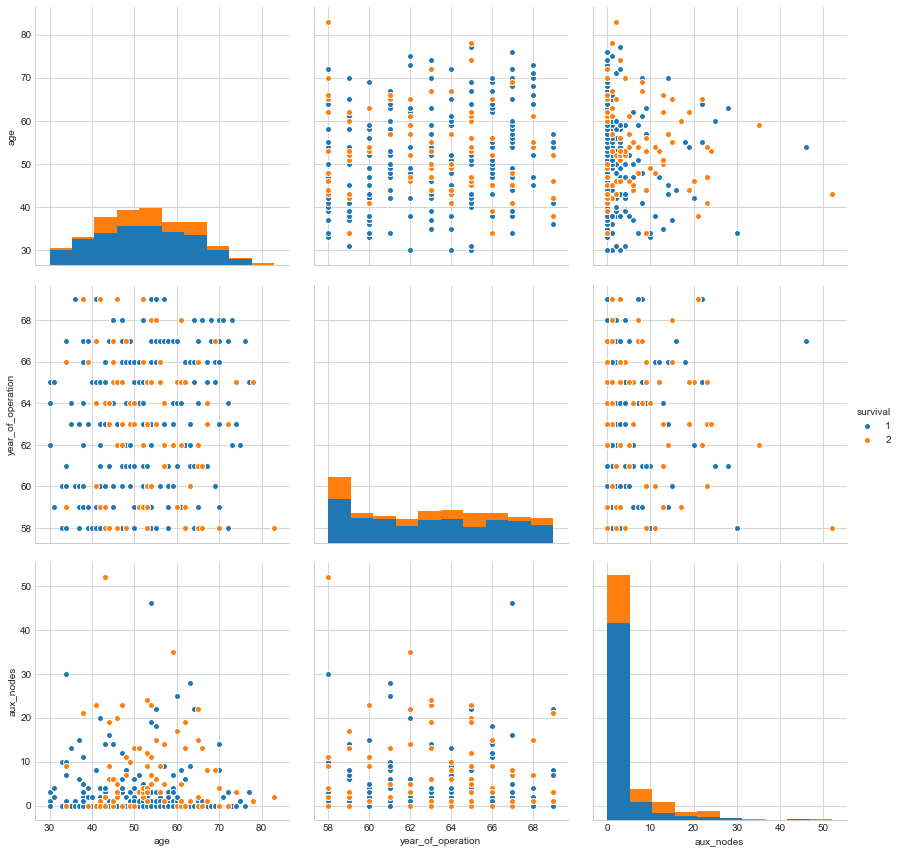

In [84]:
sns.pairplot(df, hue="survival",vars=['age','year_of_operation','aux_nodes'],size=4)
plt.show()

### Observation: 
Does not reveal any information about the dependency between the variables.

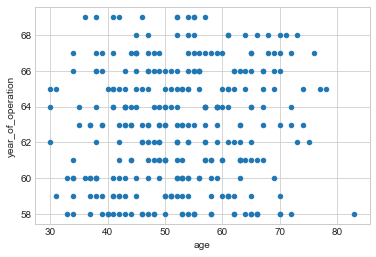

In [85]:
df.plot(kind="scatter",x="age",y="year_of_operation")
plt.show()

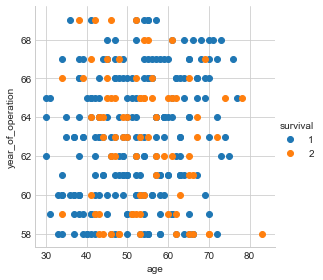

In [86]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival",size=4)\
    .map(plt.scatter,"age","year_of_operation")\
    .add_legend()
plt.show()

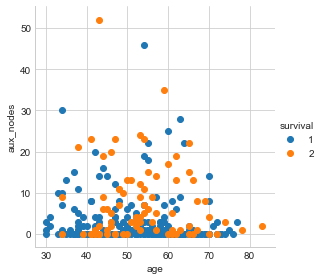

In [87]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival",size=4)\
    .map(plt.scatter,"age","aux_nodes")\
    .add_legend()
plt.show()

### Observation:
Death rate is high with aux_nodes if age > 30 years.

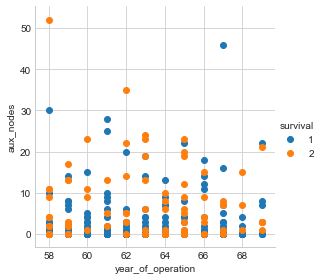

In [57]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="survival",size=4)\
    .map(plt.scatter,"year_of_operation","aux_nodes")\
    .add_legend()
plt.show()

### Observation:
Death rate is high for the age 65 if operated. 61 age is highest survival rate.